# **Predictive Analytics: Kualitas Apel**

- **Nama:** Sion Saut Parulian Pardosi
- **Email:** spardosi12@gmail.com
- **Email Dicoding:** mc114d5y1919@student.devacademy.id
- **ID Dicoding:** MC114D5Y1919

-- -

## **Deskripsi Proyek**

### **Deskripsi Latar Belakang Proyek Prediksi Kualitas Apel dengan Machine Learning**


Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi kualitas apel dengan lebih akurat dan efisien. Saat ini, penentuan kualitas apel masih dilakukan secara manual, yang memakan waktu, tenaga, dan rentan terhadap kesalahan. Hal ini menyebabkan kerugian bagi petani dan distributor, serta memberikan produk yang tidak sesuai dengan harapan konsumen. Model prediksi kualitas apel dapat membantu mengatasi permasalahan ini dengan memberikan solusi yang lebih akurat, efisien, dan transparan.

## 1. Import Library yang Dibutuhkan

In [3]:
#Import Load data Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import numpy as np

# Import train test split
from sklearn.model_selection import train_test_split
# Import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#Import Model
from sklearn.neighbors import KNeighborsClassifier # --> KNN
from sklearn.ensemble import RandomForestClassifier # --> RF
from sklearn.metrics import accuracy_score # --> matrix accuracy
from sklearn.svm import SVC # --> SVM
from sklearn.naive_bayes import BernoulliNB # --> Naive bayes
from sklearn.ensemble import ExtraTreesClassifier # --> Extra Trees Classifier


## 2. Data Understanding  


Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

### 2.1 Data Loading



Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.
Untuk informasi datasets ini telah di *bersihan* dan *normalisasi* terlebih dahulu oleh pembuat, sehingga mudah digunakan dan ramah bagi pemula.


<br>


**Informasi Datasets**


| Jenis | Keterangan |
| ------ | ------ |
| Title | Apple Quality |
| Source | [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data) |
| Maintainer | [Nidula Elgiriyewithana ⚡](https://www.kaggle.com/nelgiriyewithana) |
| License | Other (specified in description) |
| Visibility | Publik |
| Tags | Computer Science, Education, Food, Data Visualization, Classification, Exploratory Data Analysis |
| Usability | 10.00 |


In [4]:
df = pd.read_csv(r'D:\PROJECT\DBS DICODING\machine learning terapan\Proyek-Machine-Learning-Dicoding-Predictive-Analytics-Kualitas-Apel-main\apple_quality.csv')

# **2.2 Exploratory Data Analysis (EDA)**

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

## **2.2.1 EDA - Deskripsi Variabel**

In [5]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


Dari dataframe di atas kita dapat melihat bahwa pada dataset ini terdapat 9 kolom. Diantaranya:

- `A_id` : Pengidentifikasi unik untuk setiap buah
- `Size` : Ukuran buah
- `Weight` : Berat buah
- `Sweetness` : Tingkat kemanisan buah
- `Crunchiness` : Tekstur yang menunjukkan kerenyahan buah
-` Juiciness` : Tingkat kesegaran buah
- `Ripeness` : Tahap kematangan buah
- `Acidity` : Tingkat keasaman buah
- `Quality` : Kualitas buah secara keseluruhan

In [6]:
df.drop("A_id",axis=1,inplace=True)

Dikarenakan kolom `A_id` tidak mempengaruhi model maka akan di drop / dihapus.





In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


Dari eksekusi method `df.info()` terdapat:

- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: Size, Weight, Sweetness, Crunchiness, Juiciness dan Ripeness.
- Terdapat 2 kolom dengan tipe data object yaitu: Acidity dan Quality.

Namun pada data aslinya kolom ` Acidity` adalah bertipe float64, yang nantinya akan kita rubah.

In [8]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [9]:
df.shape

(4001, 8)

Dari eksekusi method` df.shape` Terlihat:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 4001 | 8 |


<br>

## **2.2.2 EDA - Menangani Missing Value dan Outliers**

In [10]:
df.duplicated().sum()

0

Melihat apakah terdapat data yang terduplikat.

In [11]:
df.Quality.value_counts(normalize=True)

Quality
good    0.501
bad     0.499
Name: proportion, dtype: float64

In [12]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [13]:
data_miss = df[df.isnull().any(axis=1)]
data_miss

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Dapat dilihat terdapat missing value yang mana akan kita hapus.

In [14]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [15]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [16]:
df["Acidity"] = df["Acidity"].astype("float64")

Merubah tipe data kolom `Acidity` menjadi data float64.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


Dapat kita lihat:
- Jumlah data` Float64` ada 7 dan `object `ada 1.

In [18]:
df.shape

(4000, 8)

Jumlah datasets menjadi `4000` dikarenakan kita telah menghapus missing value.

**Visualisasi Outlier**



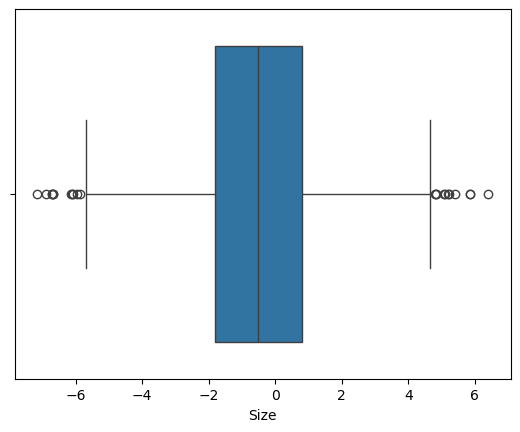

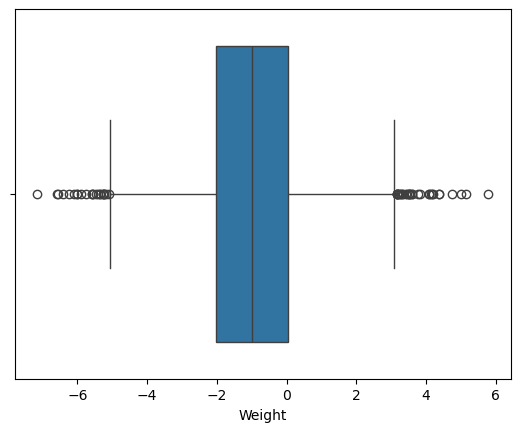

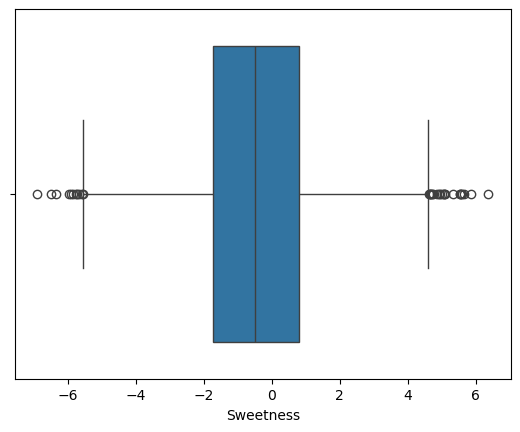

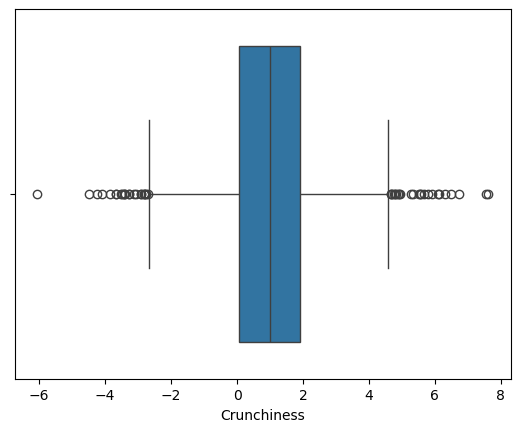

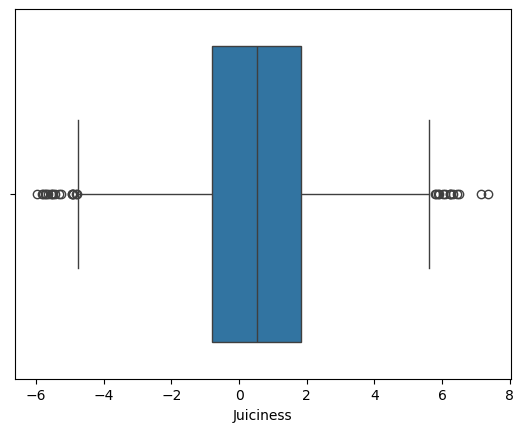

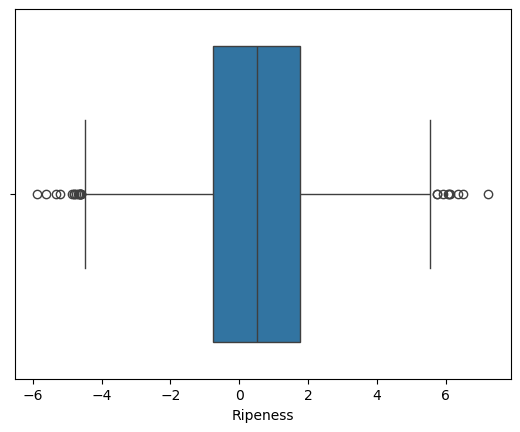

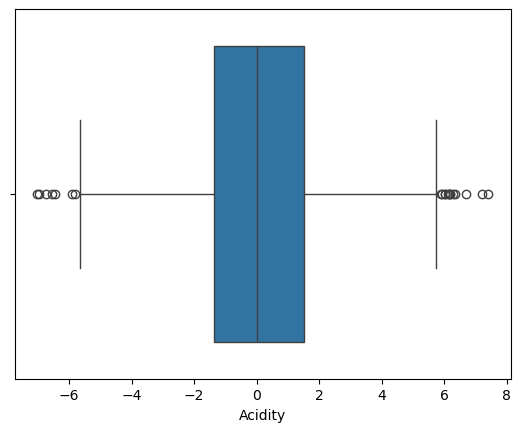

In [19]:
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

*Menghapus outliers yang ada pada dataset*  


Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.


```
IQR = Inter Quartile Range
IQR = Q3 - Q1
```



In [20]:
# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=[np.number])

# Hitung Q1, Q3, dan IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filter outlier hanya berdasarkan kolom numerik
df_clean = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
df.shape

(4000, 8)

Jumlah Datasets setalah kita hapus Outlier: `3790, 8`

## **2.2.3 EDA - Univariate Analysis**

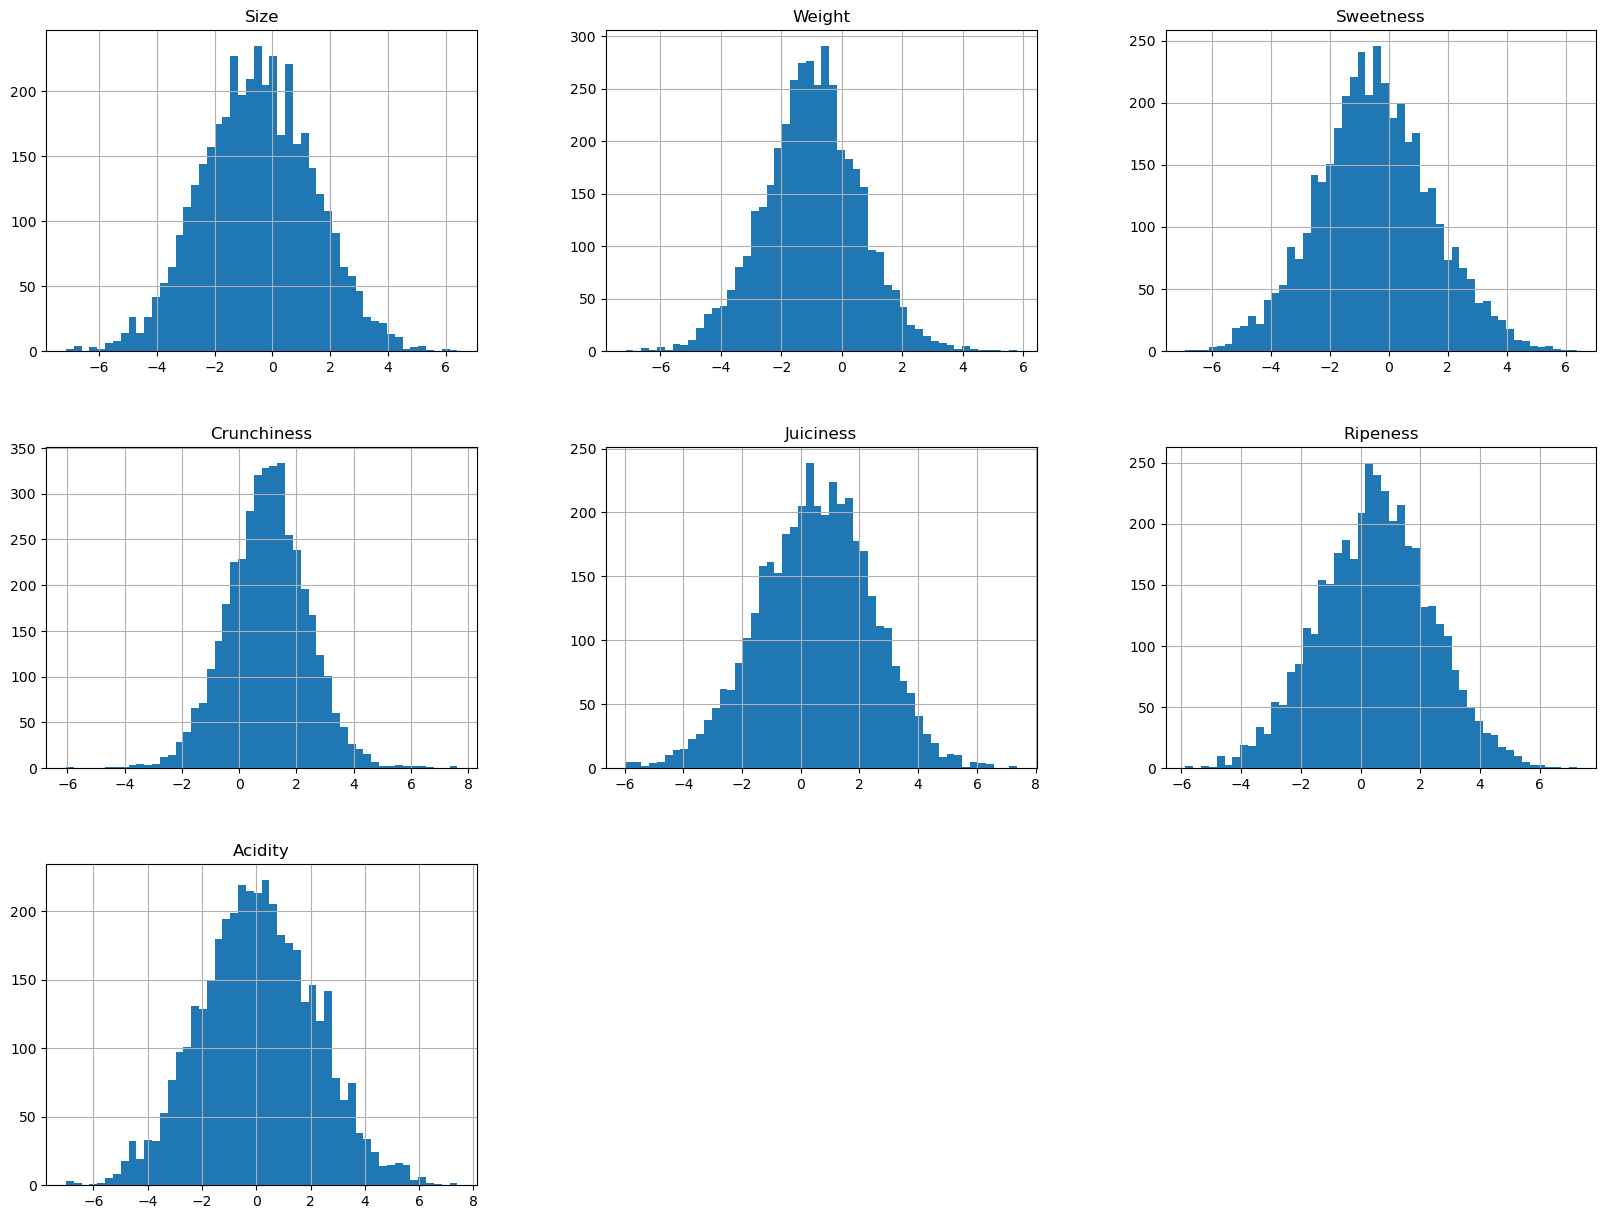

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## **2.2.4 EDA - Multivariate Analysis**

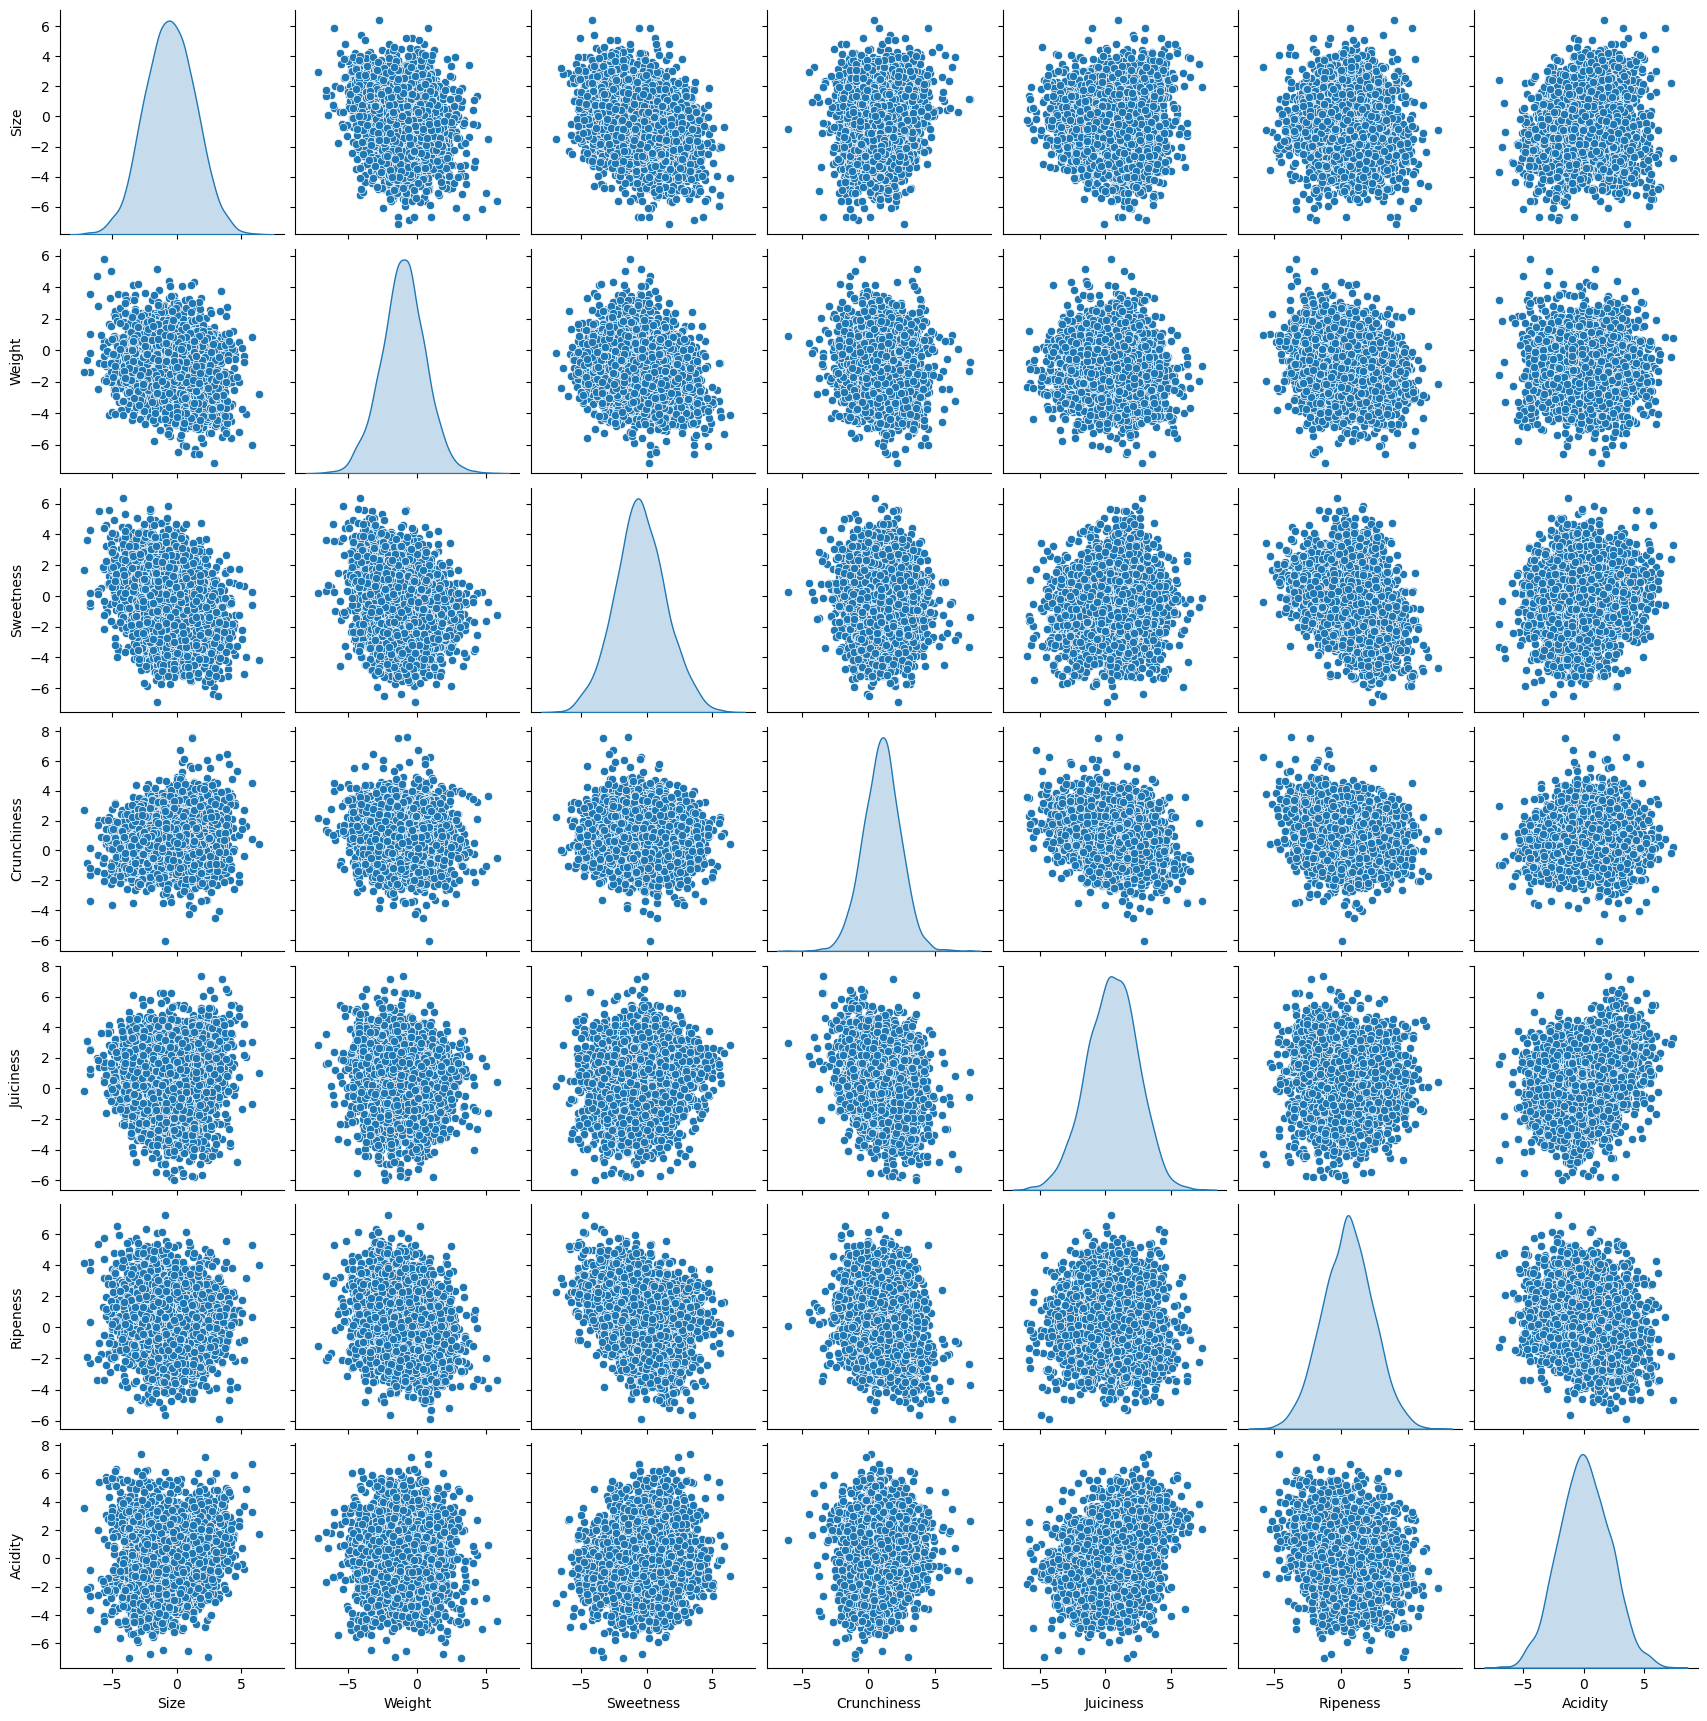

In [23]:
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-27-3ae20eb75a5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Matriks Korelasi untuk Fitur Numerik ')

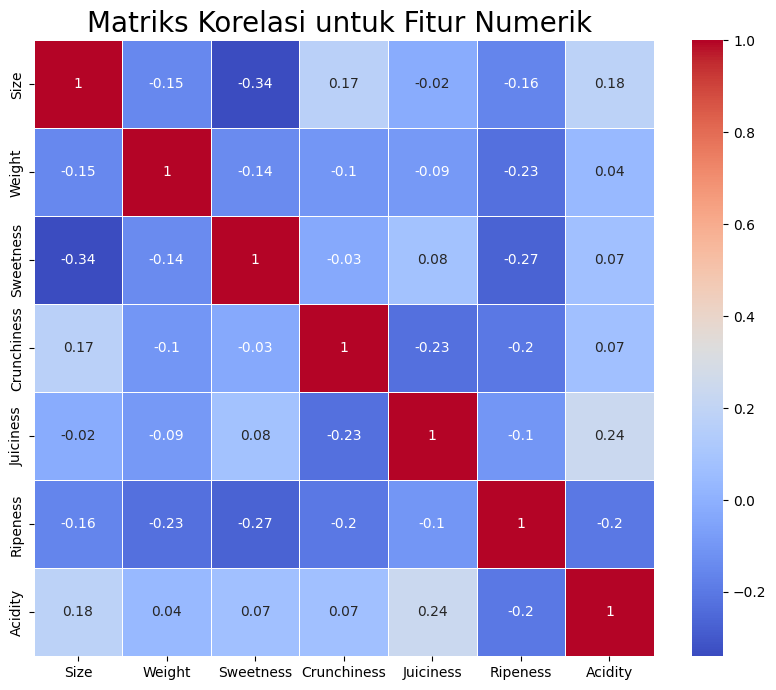

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title(f"Matriks Korelasi untuk Fitur Numerik ", size=20)

# **3. Data Preparation**

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

## **3.1 Data Clening**

In [28]:
df.Quality = (df.Quality == "good").astype(int)  # good:1 , bad:0


<ipython-input-28-60a87a6bd70a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quality = (df.Quality == "good").astype(int)  # good:1 , bad:0


In [29]:
x = df.drop("Quality",axis=1)
y = df.Quality

x.shape,y.shape

((3790, 7), (3790,))

## **3.2 Train-Test-Split**

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=60)

In [31]:
print(f'Total datasets: {len(x)}')
print(f'Total data Latih: {len(x_train)}')
print(f'Total data Uji: {len(x_test)}')

Total datasets: 3790
Total data Latih: 3032
Total data Uji: 758


## **3.3 Normalisasi**

In [32]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# **4. Model Development**

## **Lazy Predict Library**

**LazyPredict** adalah pustaka Python yang memudahkan proses pemilihan model machine learning. Ia melakukan ini dengan secara otomatis mengevaluasi dan membandingkan berbagai algoritma pembelajaran mesin pada kumpulan data.

- Keuntungan menggunakan LazyPredict:
 * **Cepat dan efisien**: LazyPredict dapat dengan cepat mengevaluasi dan membandingkan banyak model, menghemat waktu dan tenaga.
 * **Mempermudah identifikasi model potensial**: Alih-alih mencoba berbagai model secara manual, LazyPredict membantu menemukan model yang berpotensi berkinerja baik pada data.
 * **Cocok untuk analisis awal dan pembuatan prototipe**: LazyPredict memudahkan untuk memulai dengan proyek machine learning dengan cepat tanpa terjebak dalam detail pemilihan model.

In [33]:
!pip install lazypredict

In [34]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predicts = clf.fit(x_train,x_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

100%|██████████| 29/29 [00:06<00:00,  4.66it/s]

[LightGBM] [Info] Number of positive: 1477, number of negative: 1555
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3032, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487137 -> initscore=-0.051463
[LightGBM] [Info] Start training from score -0.051463
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.90               0.90     0.90      0.90   
SVC                                0.89               0.89     0.89      0.89   
KNeighborsClassifier               0.89               0.89     0.89      0.89   
LGBMClassifier                     0.89               0.89     0.89      0.89   
LabelSpreading          

**Visualisasi Model LazyPredict**

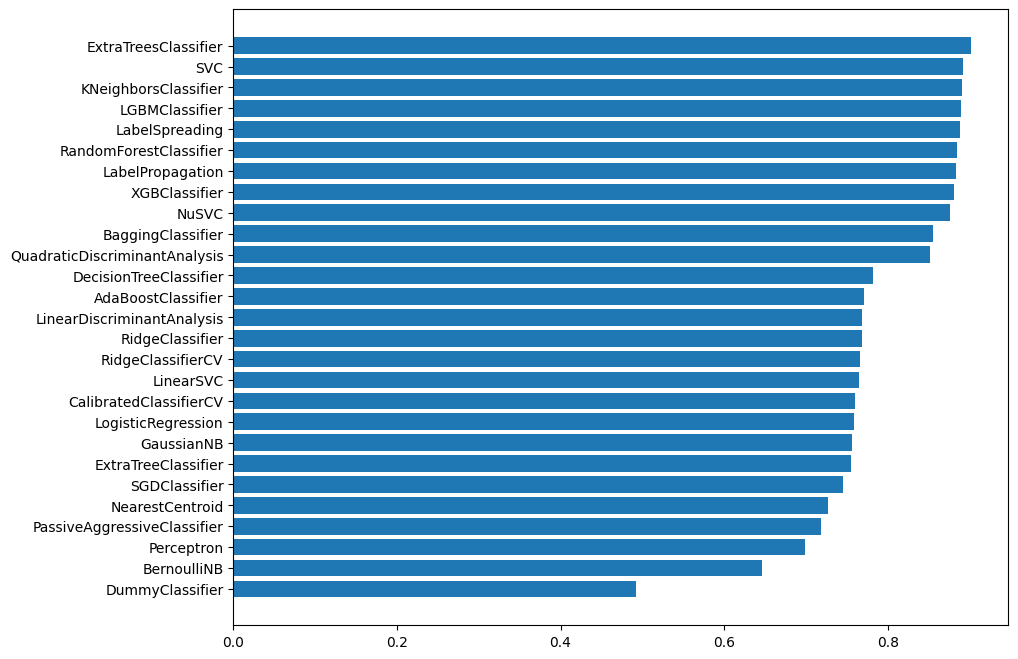

In [35]:
temp = models.sort_values(by="Accuracy",ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(temp.index,temp["Accuracy"])
plt.show()

In [36]:
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['KNN', 'RandomForest', 'SVM', 'Naive Bayes','Extra trees classifier'])

## **4.1 KNN (K-Nearest Neighbor)**

In [69]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [70]:
knn_pred = model_knn.predict(x_test)
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

## **4.2 Random Forest**

In [71]:
model_rf = RandomForestClassifier(max_depth= 20)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [72]:

rf_pred = model_rf.predict(x_test)
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)


## **4.3 Support Vector Classifier**

In [73]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [74]:
svc_pred = model_svc.predict(x_test)
models.loc['accuracy_score','SVM'] = accuracy_score(y_test, svc_pred)

### **4.4 Naive Bayes**

In [75]:
model_nb = BernoulliNB()
model_nb.fit(x_train, y_train)

BernoulliNB()

In [76]:
nb_pred = model_nb.predict(x_test)
models.loc['accuracy_score','Naive Bayes'] = accuracy_score(y_test, nb_pred)

### **4.5 Extra trees classifier**

In [77]:
model_etc = ExtraTreesClassifier(n_estimators=100, max_depth= 10,n_jobs= 2,random_state= 100)
model_etc.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=10, n_jobs=2, random_state=100)

In [78]:
etc_pred = model_etc.predict(x_test)
models.loc['accuracy_score','Extra trees classifier'] = accuracy_score(y_test, etc_pred)

# **5. Evaluasi Model**

## **5.1 Score Model**

In [79]:
print(models)

                KNN RandomForest  SVM Naive Bayes Extra trees classifier
accuracy_score 0.89         0.89 0.89        0.49                   0.87


## **5.2 plot Model**

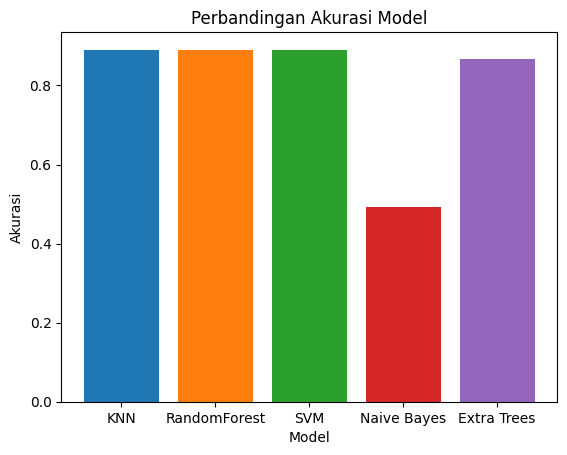

In [80]:
plt.bar('KNN', models['KNN'])
plt.bar('RandomForest', models['RandomForest'])
plt.bar('SVM', models['SVM'])
plt.bar('Naive Bayes', models['Naive Bayes'])
plt.bar('Extra Trees', models['Extra trees classifier'])
plt.title("Perbandingan Akurasi Model");
plt.xlabel('Model');
plt.ylabel('Akurasi');
plt.show()